In [22]:
# Standard modules
import numpy as np
import pandas as pd

# Preprocessing module
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Cross validation module
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Pipeline module
from sklearn.pipeline import make_pipeline, Pipeline

# Classifier modules
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Performance metric modules
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('data/OralCancerData.csv', sep=',', header = 0, index_col = 0)
df.head()
df = df.to_numpy()

In [8]:
y = df[:, -1]
X = df[:, :-1]
num_samples, num_features = X.shape
num_labels = np.unique(y).shape[0]

print(f'Number of samples = {num_samples}')
print(f'Number of features = {num_features}')
print(f'Number of output labels = {num_labels}')

Number of samples = 135
Number of features = 1024
Number of output labels = 3


In [9]:
# Perform nested cross validation with 5-fold outer cross-validation
## for model performance estimation and 3-fold inner cross validation procedure
## for hyperparameter tuning to get the best model

def grid_search_cv(model, param_grid):
    rs = 1
    # Configure the outer cross validation procedure
    cv_outer = KFold(n_splits = 5, shuffle = True, random_state = rs)

    # List for storing outer cv results
    outer_cv_results = []

    for train_ix, test_ix in cv_outer.split(X):
        # Split data into train & test sets
        # TODO understand?
        X_train, X_test = X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]

        # Configure the inner cross validation procedure
        cv_inner = KFold(n_splits = 3, shuffle = True, random_state = rs)

        # Create a pipeline for inner CV
        pipe_inner = Pipeline(steps = [('preprocess', MinMaxScaler()),
                                    ('model', model)])

        # Define inner CV grid search using the pipeline
        grid_search = GridSearchCV(pipe_inner,
                                    param_grid,
                                    scoring = 'accuracy',
                                    n_jobs = 1,
                                    cv = cv_inner)

        # Execute the inner cv
        inner_cv_result = grid_search.fit(X_train, y_train)

        # Get the best performing model on the whole training set
        best_model = grid_search.best_estimator_

        # Evaluate the best model on the test dataset with the preprocessing applied
        yhat = best_model.predict(X_test)
        acc = accuracy_score(y_test, yhat)

        # Store the outer cv perf result
        outer_cv_results.append(acc)

        # Report the progress
        print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, inner_cv_result.best_score_, inner_cv_result.best_params_))

    ## Summarize the estimated performance of the model
    print('Accuracy: %.3f (%.3f)' % (np.mean(outer_cv_results), np.std(outer_cv_results)))

# SVM

In [35]:
# Define classifier model
model = SVC(kernel = 'rbf')
# Define hyper-parameter search space
param_grid = {
    'model__C': [1e04, 1e02, 1e01, 1e-0, 1e-02, 1e-04],
    'model__gamma': [1e01, 1e-0, 1e-01, 1e-02, 1e-03, 1e-04]
}
grid_search_cv(model, param_grid)

>acc=0.667, est=0.620, cfg={'model__C': 100.0, 'model__gamma': 0.001}
>acc=0.630, est=0.630, cfg={'model__C': 1.0, 'model__gamma': 0.1}
>acc=0.444, est=0.639, cfg={'model__C': 10000.0, 'model__gamma': 0.0001}
>acc=0.630, est=0.583, cfg={'model__C': 1.0, 'model__gamma': 0.1}
>acc=0.481, est=0.620, cfg={'model__C': 10000.0, 'model__gamma': 0.1}
Accuracy: 0.570 (0.090)


In [38]:
# Define classifier model
model = SVC(kernel = 'poly')
# Define hyper-parameter search space
param_grid = {
    'model__C': [1e04, 1e02, 1e01, 1e-0, 1e-02, 1e-04],
    'model__gamma': [1e01, 1e-0, 1e-01, 1e-02, 1e-03, 1e-04],
    'model__degree': [2,3,4]
}
grid_search_cv(model, param_grid)

>acc=0.667, est=0.602, cfg={'model__C': 10.0, 'model__degree': 2, 'model__gamma': 0.01}
>acc=0.593, est=0.593, cfg={'model__C': 10000.0, 'model__degree': 2, 'model__gamma': 0.0001}
>acc=0.519, est=0.639, cfg={'model__C': 10000.0, 'model__degree': 2, 'model__gamma': 0.0001}
>acc=0.593, est=0.593, cfg={'model__C': 10.0, 'model__degree': 2, 'model__gamma': 0.01}
>acc=0.519, est=0.583, cfg={'model__C': 10.0, 'model__degree': 4, 'model__gamma': 0.01}
Accuracy: 0.578 (0.055)


In [40]:
# Define classifier model
model = SVC()
# Define hyper-parameter search space
param_grid = {
    'model__C': [1e04, 1e02, 1e01, 1e-0, 1e-02, 1e-04],
    'model__gamma': [1e01, 1e-0, 1e-01, 1e-02, 1e-03, 1e-04],
    'model__kernel': ['linear']
}
grid_search_cv(model, param_grid)

>acc=0.667, est=0.630, cfg={'model__C': 1.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
>acc=0.556, est=0.593, cfg={'model__C': 1.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
>acc=0.444, est=0.611, cfg={'model__C': 1.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
>acc=0.593, est=0.556, cfg={'model__C': 10.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
>acc=0.741, est=0.565, cfg={'model__C': 1.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
Accuracy: 0.600 (0.100)


In [42]:
# Define classifier model
model = SVC()
# Define hyper-parameter search space
param_grid = {
    'model__C': [1e04, 1e02, 1e01, 1e-0, 1e-02, 1e-04],
    'model__gamma': [1e01, 1e-0, 1e-01, 1e-02, 1e-03, 1e-04],
    'model__kernel': ['sigmoid']
}
grid_search_cv(model, param_grid)

>acc=0.667, est=0.620, cfg={'model__C': 10000.0, 'model__gamma': 0.0001, 'model__kernel': 'sigmoid'}
>acc=0.593, est=0.620, cfg={'model__C': 100.0, 'model__gamma': 0.001, 'model__kernel': 'sigmoid'}
>acc=0.519, est=0.620, cfg={'model__C': 100.0, 'model__gamma': 0.001, 'model__kernel': 'sigmoid'}
>acc=0.556, est=0.537, cfg={'model__C': 10000.0, 'model__gamma': 0.0001, 'model__kernel': 'sigmoid'}
>acc=0.741, est=0.565, cfg={'model__C': 10000.0, 'model__gamma': 0.0001, 'model__kernel': 'sigmoid'}
Accuracy: 0.615 (0.080)


# Nåive Bayes

In [12]:
# Define classifier model
model = GaussianNB()
# Define hyper-parameter search space
param_grid = {
}
grid_search_cv(model, param_grid)

>acc=0.667, est=0.630, cfg={}
>acc=0.519, est=0.620, cfg={}
>acc=0.556, est=0.602, cfg={}
>acc=0.630, est=0.583, cfg={}
>acc=0.519, est=0.611, cfg={}
Accuracy: 0.578 (0.060)


# Decision Tree

In [15]:
# Define classifier model
model = DecisionTreeClassifier(random_state=1)
# Define hyper-parameter search space
param_grid = {
    'model__criterion': ['gini', 'entropy']
}
grid_search_cv(model, param_grid)

>acc=0.593, est=0.500, cfg={'model__criterion': 'entropy'}
>acc=0.370, est=0.583, cfg={'model__criterion': 'gini'}
>acc=0.593, est=0.509, cfg={'model__criterion': 'gini'}
>acc=0.407, est=0.454, cfg={'model__criterion': 'gini'}
>acc=0.481, est=0.500, cfg={'model__criterion': 'entropy'}
Accuracy: 0.489 (0.092)


In [18]:
# Define classifier model
model = RandomForestClassifier(random_state=1)
# Define hyper-parameter search space
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__n_estimators': [100, 250, 500]
}
grid_search_cv(model, param_grid)

>acc=0.630, est=0.593, cfg={'model__criterion': 'entropy', 'model__n_estimators': 100}
>acc=0.593, est=0.620, cfg={'model__criterion': 'gini', 'model__n_estimators': 500}
>acc=0.444, est=0.574, cfg={'model__criterion': 'gini', 'model__n_estimators': 500}
>acc=0.556, est=0.593, cfg={'model__criterion': 'gini', 'model__n_estimators': 100}
>acc=0.630, est=0.630, cfg={'model__criterion': 'gini', 'model__n_estimators': 250}
Accuracy: 0.570 (0.069)


# KNN

In [21]:
# Define classifier model
model = KNeighborsClassifier()
# Define hyper-parameter search space
param_grid = {
    'model__n_neighbors': [5, 10, 20],
    'model__metric': ['euclidean', 'manhattan']
}
grid_search_cv(model, param_grid)

>acc=0.667, est=0.565, cfg={'model__metric': 'euclidean', 'model__n_neighbors': 10}
>acc=0.593, est=0.620, cfg={'model__metric': 'manhattan', 'model__n_neighbors': 5}
>acc=0.556, est=0.602, cfg={'model__metric': 'manhattan', 'model__n_neighbors': 10}
>acc=0.481, est=0.565, cfg={'model__metric': 'euclidean', 'model__n_neighbors': 5}
>acc=0.593, est=0.630, cfg={'model__metric': 'manhattan', 'model__n_neighbors': 10}
Accuracy: 0.578 (0.060)


# PCA

In [4]:
from sklearn.decomposition import PCA

df2 = pd.read_csv('data/OralCancerData.csv', sep=',', header = 0, index_col = 0)

pca = PCA(n_components=2)
pcs = pca.fit_transform(df2.iloc[:, :-1])
df2['pc1'] = pcs[:,0]
df2['pc2'] = pcs[:,1]
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,Label,pc1,pc2
M10LCLESION1,1.21870,1.22150,1.23260,1.24910,1.27210,1.28200,1.27880,1.26740,1.25350,1.24050,...,0.036554,0.018306,0.002395,-0.001093,0.011570,0.028145,0.026469,0,-0.466247,5.356935
M2LCLESION,0.48689,0.49425,0.50150,0.50485,0.50666,0.50967,0.51672,0.52545,0.53464,0.54266,...,0.004626,0.004651,0.002123,0.001995,0.001278,0.003504,0.002832,0,3.089102,2.895830
M12RCLESION,0.84589,0.86129,0.86966,0.87605,0.88683,0.89870,0.90839,0.91491,0.92007,0.92514,...,0.000037,0.001354,0.002109,0.002969,0.005937,0.009449,0.009056,0,-3.716229,-0.124117
M14LC1,0.30798,0.31296,0.31622,0.31876,0.32229,0.32562,0.32850,0.33110,0.33391,0.33686,...,-0.002230,-0.002266,-0.002443,-0.002820,-0.002754,-0.002487,-0.003224,0,4.605701,0.407585
M17LCLESION1,0.86088,0.87370,0.88305,0.89150,0.90274,0.91265,0.92044,0.92729,0.93490,0.94293,...,-0.001193,-0.000523,0.000028,0.000667,0.003112,0.005853,0.004711,0,-4.592204,0.298779


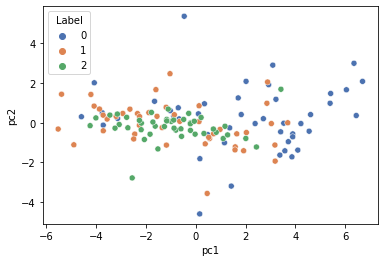

In [5]:
import seaborn as sns
sns.scatterplot(data=df2, x='pc1', y='pc2', hue='Label', palette='deep')